
**Question 1** Ouvrez un nouveau cahier dans lequel vous complèterez le code suivant:

In [426]:

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [427]:
def gradient_descent(
    f : callable,
    x0 : float,
    eta : float,
    epsilon : float
): 
        x = sp.symbols("x")
        df = sp.lambdify(x,sp.diff(f(x),x))

        result = x0
        num_iter = 0
        while (abs(df(result)) > epsilon and num_iter < 1e4):
            result = result - eta*df(result)
            num_iter += 1

        print(f"num iter = {num_iter}")
        return result

In [428]:
gradient_descent(
    lambda x: x**4,
    np.random.rand(),
    0.5,
    1e-6
)

num iter = 6289


0.006299133275237522

**Question 2** Testez votre code avec les paramètres g = lambda x : x**2-x+1, eta=.01 et x0=10 et epsilon=.01

In [429]:
gradient_descent(
    lambda x: x**2 - x + 1,
    10,
    0.1,
    1e-2
)

num iter = 34


0.5048170722808673

**Question 3** Essayez maintenant avec la fonction f = lambda x: 0.01*(x ** 4+2*x**3-12*x**2-2*x+6) et les mêmes paramètres que précedemment. Cette fonction a deux minima en 
x
1
≈
−
3.28
 et 
x
2
≈
1.86
. Si vous avez implémenté l'algorithme tel que donné ci-dessus, il aura normalement trouvé une valeur proche de 
x
2
, mais la valeur en 
x
1
 est plus faible. L'algorithme a donc renvoyé un minimum local au lieu du minimum global.


In [430]:
gradient_descent(
    lambda x: 0.01*(x**4 + 2*x**3 -12*x**2 -2*x +6),
    10,
    0.1,
    1e-2
)

num iter = 89


1.8879268815398067

**Question 4** Vous pouvez ressayer sur f avec eta = .2, x0 = -4 et epsilon = 0.1. Porquoi le résultat est il différent?

In [431]:
gradient_descent(
    lambda x: 0.01*(x**4 + 2*x**3 -12*x**2 -2*x +6),
    -4,
    0.2,
    1e-1
)

num iter = 10


-3.4117861632904525

Le résultat est different parce que nous sommes plus proches du maximun global

**Question 5** Trouvez des conditions initiales avec lesquelles l'algorithme ne termine pas pour la fonction $f(x) = x^2$

In [432]:
gradient_descent(
    lambda x: x**2,
    1,
    1,
    1e-1
)

num iter = 10000


1

## Fashion MNIST classification

Écrivez une fonction propagate(w,b,training_data) qui renvoie un couple (cout,gradw,gradb) contenant le coût 
S
(
w
)
 et le gradient de 
S
 en 
w
 et en 
b
. On pourra commencer par calculer, sur papier, l'expression du gradient. Pour le calcul matriciel on se servira de Numpy.

On sait que 

$$
    S(\omega) = \frac{1}{n}(y_i - \omega  x_i - b)^2 \\

    \frac{\partial S}{\partial \omega} =\frac{1}{n} (y_i - \omega  x_i - b) \vec x \\ 

    \frac{\partial S}{\partial b} =\frac{1}{n} (y_i - \omega  x_i - b) 
$$

In [433]:
from torchvision import datasets
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(".",download=True,train=True)
test_data = datasets.FashionMNIST(".",download=True,train=False)

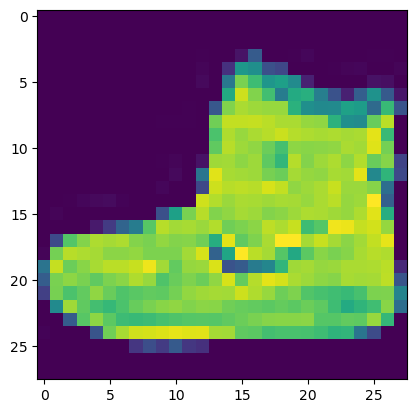

In [434]:
plt.imshow(training_data[0][0])

In [435]:

test_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in test_data]
training_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in training_data]
np.random.shuffle(training_data) # on mélange les données d'entraînement qui étaient classées

In [436]:
len(training_data[0][0])

784

In [437]:
def propagate(
    w : np.ndarray,
    b : float,
    training_data
):
    n = len(training_data)

    cost = 0
    gradw = np.zeros_like(w)
    gradb = 0
    for i in range (len(training_data)):
        y_true = training_data[i][1]
        X = training_data[i][0]
        y_hat = X.dot(w)+ b
        
        cost += (y_true - y_hat)**2/n
        gradw += (y_hat - y_true)*training_data[i][0]/n
        gradb += 1/n * (y_hat - y_true)

    return cost, gradb, gradw

In [438]:
w = np.random.rand(28**2)
b = np.random.rand()

_, gradb, gradw = propagate(w, b, training_data)

Écrivez une fonction ```optimize_gd(w,b,training_data,rate=5e-3,maxiter=1000,info=10)``` qui implémente la descente de gradient et renvoie un triplet `(w,b,costs)` contenant les valeurs de 
→
w
 et 
b
 ainsi qu'un tableau contenant le coût à chaque itération. La fonction termine soit quand on a atteint le nombre maximal d'itérations maxiter, soit quand la norme du gradient est suffisamment proche de 0 (en pratique ce sera souvent le premier cas).

In [439]:
def optimize_gd(
    w : np.ndarray,
    b:float,
    training_data,
    learning_rate : float = 5e-3,
    maxiter : int = 40,
    info = 10
):
    cost, gradb, gradw = propagate(w, b, training_data)

    costs_list = []
    costs_list.append(cost)
    n_iter = 0

    while ((max(np.linalg.norm(gradw), abs(gradb)) > info) &
           (n_iter < maxiter)):
        
        n_iter += 1

        w -= gradw*learning_rate
        b -= gradb*learning_rate

        cost, gradb, gradw = propagate(w, b, training_data)
        costs_list.append(cost)

    return w, b, costs_list



In [440]:
np.linalg.norm(np.random.rand(28**2))

15.8613174736704

In [441]:
w, b, costs_list = optimize_gd(np.random.rand(28**2),
                              np.random.rand(),
                              training_data[:10_000],
                              info = 1,
                              learning_rate=5e-3)

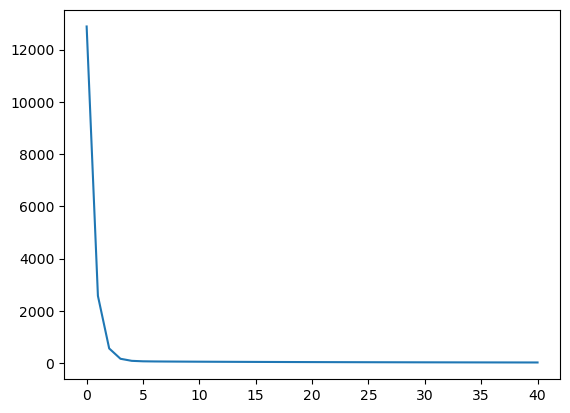

In [442]:
plt.plot(costs_list)

In [443]:
i = 10
X = training_data[i][0]
y_hat = X.dot(w)+ b

In [444]:
y_hat

5.295911376555483

In [445]:
training_data[i][1]

9

In [446]:
def test_params(
    w : np.ndarray,
    b: float,
    training_data
):
    score = 0
    for i in range(len(training_data)):
        X = training_data[i][0]
        y_hat = X.dot(w)+ b
        
        if (abs(y_hat - training_data[i][1]) < 0.5):
            score += 1/len(training_data)

    return score

    

In [447]:
test_params(w, b, training_data[:10000])

0.09100000000000158

## Stochastic gradient descent

Écrivez la version stochastique ```optimize_sgd(w,b,training_data,rate=5e-4,maxiter=40,info=1)``` de la fonction optimize_gd (si l'on a écrit la fonction propagate de manière suffisamment générique, on pourra utiliser les slices de python pour se simplifier le travail) . On fera attention à bien calculer le coût. maxiter représentera ici le nombre de fois où l'on itère sur tout le jeu de données.

In [448]:
w = np.random.rand(28**2)
b = np.random.rand()

i = np.random.randint(0, 10000 - 1)
n_iter = 0
info = 1
maxiter = 1_000_000

n_epochs = 1000

cost, gradb, gradw = propagate(w,
                               b,
                               training_data)


In [450]:
def optimize_sgd(w :np.ndarray,
                 b : float,
                 training_data, 
                 learning_rate : float = 5e-4,
                 maxiter : int = 40,
                 info : int = 1):
        """Stochastic gradient descent implementation
        """        
    
        n_iter = 0
        cost, gradb, gradw = propagate(w, b, training_data)
    
        while ((max(np.linalg.norm(gradw, np.inf), abs(gradb)) > 1e-6) ):
    

                n_iter += 1 

                i = np.random.randint(0,10000 - 1)

                new_cost, gradb, gradw = propagate(w,
                                                b,
                                                training_data[i:i+1])
                w -= gradw * learning_rate
                b -= gradb * learning_rate

        return w, b



In [451]:
w, b = optimize_sgd(
    np.random.rand(28**2),
    np.random.rand(),
    training_data[:10_000],
    maxiter=10_000
)

In [452]:
test_params(w, b, training_data[:10_000])

0.3250999999999805

Écrivez la fonction `optimize_sgdm(w,b,training_data,batch_size=100,rate=5e-4,maxiter=40,info=1)`, la version mini-batch de optimize_sgd.

In [455]:
def optimize_sgdm(w : np.ndarray,
                  b : float,
                  training_data,
                  batch_size : int =100,
                  rate : float =5e-4,
                  maxiter: int = 40,
                  info : float=1):
    
    if (batch_size > len(training_data)):
          raise ValueError("batch_size cannot be greater than the size of training_data")
    n_iter = 0
    cost, gradb, gradw = propagate(w, b, training_data)

    while ((max(np.linalg.norm(gradw, np.inf), abs(gradb)) > 1e-6) &
           (n_iter < maxiter)):


            n_iter += 1 

            i = np.random.randint(0,len(training_data) - batch_size - 1 )

            new_cost, gradb, gradw = propagate(w,
                                            b,
                                            training_data[i:i+batch_size])
            w -= gradw * rate
            b -= gradb * rate

    return w, b

In [456]:
w,b = optimize_sgdm(np.random.rand(28**2),
                    np.random.rand(),
                    training_data[:10_000],
                    maxiter=10_000,
                    info = 1e-6)

In [457]:
test_params(w,b, training_data[:10_000])

0.2453999999999893

**Question 11** Implémentez `def optimize_sgd_moment(w,b,training_data,rate=1e-3,mu=0.95,maxiter=40,info=1)`.


In [496]:
def optimize_sgd_moment(w : np.ndarray ,
                        b: float,
                        training_data,
                        rate : float = 1e-3,
                        mu: float = 0.95,
                        maxiter: int = 40,
                        info: float = 1e-6):
    np.random.shuffle(training_data)
    n_iter = 0
    cost, gradb, gradw = propagate(w, b, training_data)

    v = np.zeros_like(w)

    while ((max(np.linalg.norm(gradw, np.inf), abs(gradb)) > info) &
           (n_iter < maxiter)):

        n_iter += 1 

        i = np.random.randint(0,len(training_data) - 1 )

        new_cost, gradb, gradw = propagate(w,
                                            b,
                                            training_data[i:i+1])
        v = mu*v + gradw*rate
        
        w -= v
        b -= gradb * rate

    return w, b

In [534]:
w,b = optimize_sgd_moment(np.random.rand(28**2),
                          np.random.rand(),
                          training_data[:10_000],
                          maxiter=10_000,
                          mu = 0.8,
                          info = 1e-6)

In [535]:
test_params(w,b, training_data[:10_000])

0.2970999999999836

## Adam Optimizer

**Question 13.** Implémentez la descente de gradient stochastique avec Adam `def optimize_sgd_adam(w,b,training_data,rate=1e-3,beta1=0.9,beta2=0.999,epsilon=1e-8,maxiter=10,info=1)`. 

In [566]:
def optimize_sgd_adam(w: np.ndarray,
                      b: float,
                      training_data,
                      rate: float =1e-3,
                      beta1: float =0.9,
                      beta2 : float =0.999,
                      epsilon: float =1e-8,
                      maxiter : int=10,
                      info : float =1):
    
    np.random.shuffle(training_data)
    n_iter = 0
    cost, gradb, gradw = propagate(w, b, training_data)

    v = np.zeros_like(w)
    m = np.zeros_like(w)

    while ((max(np.linalg.norm(gradw, np.inf), abs(gradb)) > info) &
           (n_iter < maxiter)):

        n_iter += 1 

        i = np.random.randint(0,len(training_data) - 1 )

        new_cost, gradb, gradw = propagate(w,
                                            b,
                                            training_data[i:i+1])
        
        m = beta1* m + (1 - beta1) * gradw
        v = beta2*v + (1 - beta2) * gradw**2

        m_hat = m/(1 - beta1 ** n_iter)
        v_hat = v/(1- beta2 ** n_iter)
        
        w -= rate * m_hat/(np.sqrt(v_hat) + epsilon)
        b -= gradb * rate

    return w, b

In [603]:
w,b = optimize_sgd_adam(np.random.rand(28**2),
                        np.random.rand(),
                        training_data[:10_000],
                        maxiter=10_000,
                        # beta1=0.99999,
                        # beta2=0.1,
                        rate=4e-3,
                        info = 1e-6)

In [604]:
test_params(w,b, training_data[:10_000])

0.2725999999999863